In [144]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.1.0'

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
# fix random seed for reproducibility
seed = 0
np.random.seed(seed)

In [147]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Deep learning projects/Bank Chrun Project/bank.csv')

In [149]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## EDA

In [150]:
df.shape

(10000, 14)

In [151]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [152]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [153]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [154]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

* Rower number and cusotmer ID are unqiue for each entry and have no duplicates however Cusomer Id, Surname and Row number are not likely to provide any specific info and will be deleted druing further analysis
* Data is represented from 3 different geography
* Gender and Geography are categorical and will be label encoded


In [0]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [156]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

### Univariates analysis

In [0]:
# seperate catogrical and numerical varaiable
catcol=list([])
numcol=list([])

for i in df.columns:
  if df[i].dtypes=='object' :
    catcol.append(i)
  else :
    numcol.append(i)


In [158]:
catcol

['Geography', 'Gender']

In [159]:
numcol

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [160]:
df.Exited.unique()

array([1, 0])

Text(0.5, 1.0, 'Count plot of Target variable : "Exited"')

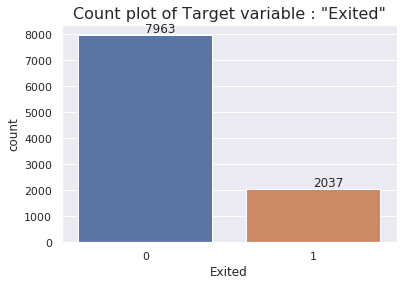

In [161]:
# univariate analysis Target variable
sns.set()
barplot=sns.countplot(df['Exited']) # plot the Target variable
for bar in barplot.patches: # annotate the values
    yval = bar.get_height()
    barplot.annotate('%0.0f'%(yval),(bar.get_x() + bar.get_width()/2.0,yval), va='bottom')
plt.title('Count plot of Target variable : "Exited"',fontsize=16) # print the title

* Target variable is distributed in ~ 80 : 20 ratio and customer who didnot exit (majority class)  will be predicted more accurately.
* Null model is likely to have 80% accuracy

In [162]:
df[numcol].describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


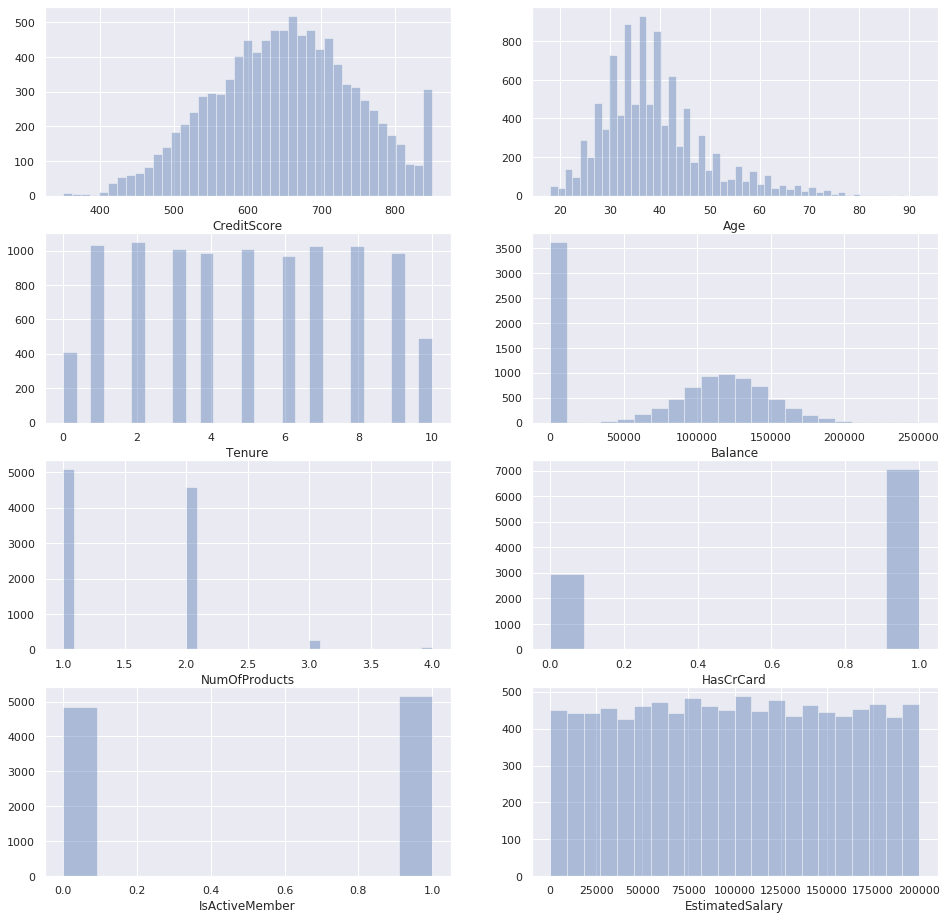

<Figure size 432x288 with 0 Axes>

In [163]:
sns.set()
k=0
row=4
col=2
fig,ax=plt.subplots(nrows=row,ncols=col,figsize=(16,16))
plt.figure(constrained_layout=True)
for i in np.arange(row) : 
    for j in np.arange(col):
        sns.distplot(df[numcol[k]],ax=ax[i,j],kde=False)
        if k==7 :
            break
        else :
            k=k+1

### Observation
* Credit score is normally distributed
* Age is right skewed
* Tenure of bank account has a uniform rectangular distributed
* ~ 35 % of the customer has zero balance
* ~ 99% of the customer have 2 or less product affiliated
* ~ 70% of the customer have credit card issued from the bank
* ~ 50% of the cusotmer are active members
* Estimated salary of the customer is uniformly distributed (rectangle distribution

### Bivariate Analysis

Uncorelated predicter variable with high discriminant power is required to build a high quaility classification model.
We shall check the corelation between the predicters variable

### Numerical variables

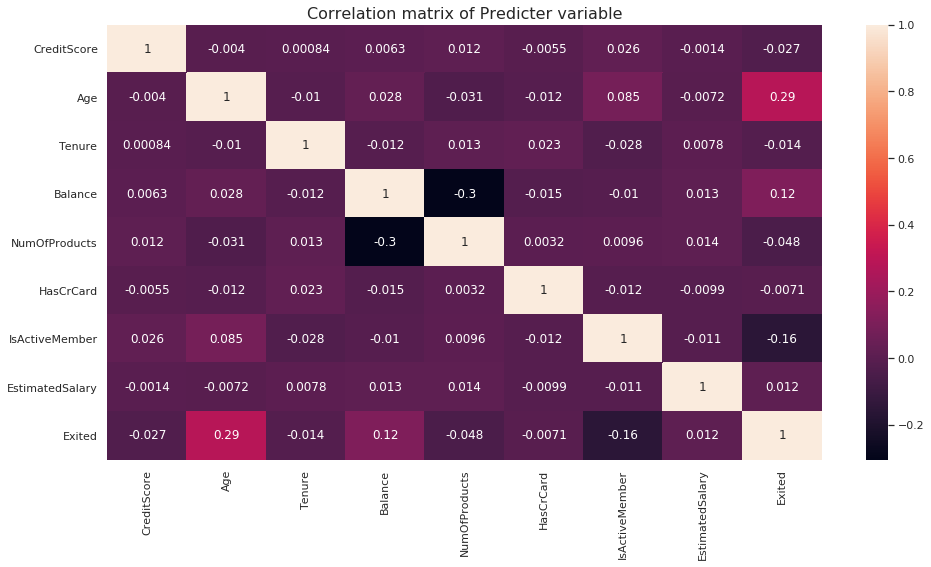

<Figure size 1152x576 with 0 Axes>

In [164]:
# Plot corelation matrix
fig=plt.figure(figsize=(16,8))
sns.heatmap(df[numcol].corr(),annot=True)
plt.title('Correlation matrix of Predicter variable',fontsize=16)
plt.show()
fig=plt.figure(figsize=(16,8))

* Predictor varaible are not strongly inter corelated

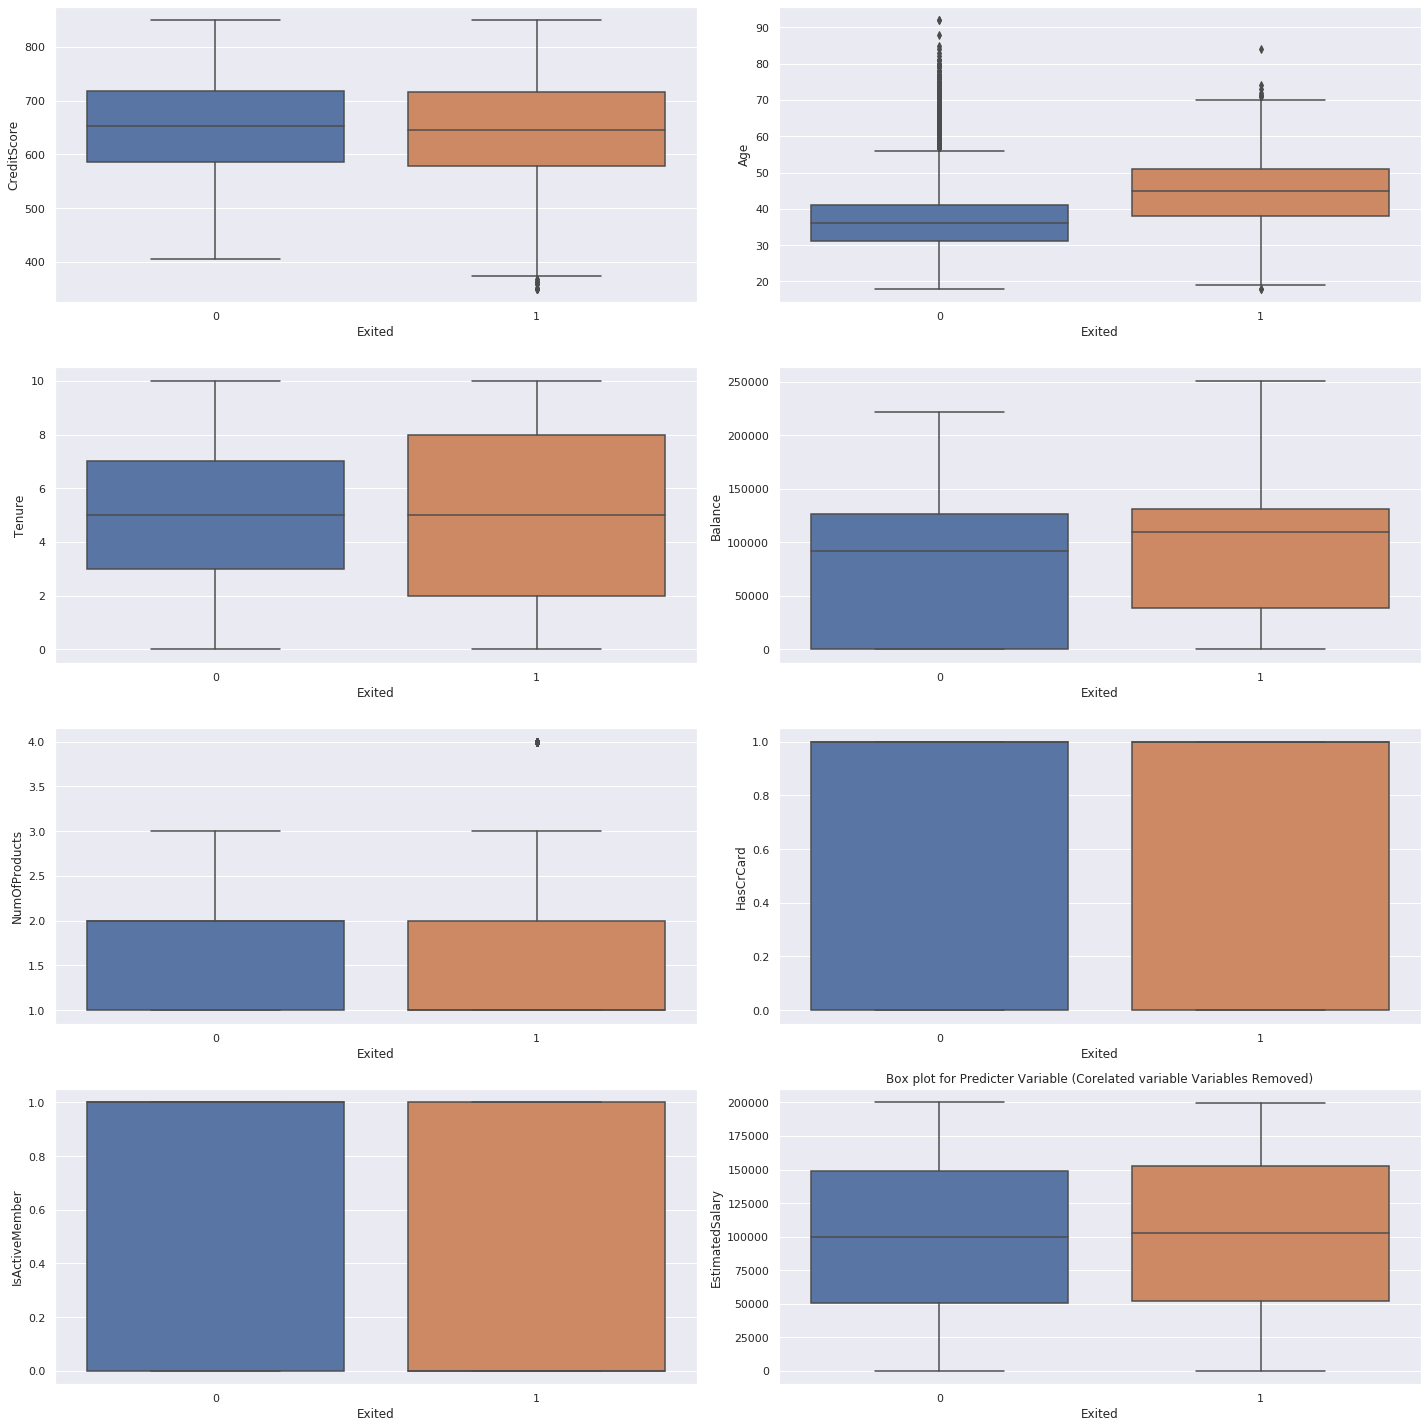

In [165]:
sns.set()  # plot category columns
rows =4
cols=2
i=0
j=0
k=0

fig, axs = plt.subplots(rows,cols,figsize=(20,20))
plt.title('Box plot for Predicter Variable (Corelated variable Variables Removed)')
while(j<rows):
    k=0
    while(k < cols) :
        if i>len(numcol)-1:
            break
        g=sns.boxplot(y=numcol[i],data=df[numcol],ax=axs[j,k],x='Exited')
        # g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')
        # for p in g.patches :
        #     g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        i+=1
        k+=1
    j+=1

fig.tight_layout()

Observation :
* Week predictors : Estimated salary,Is Active member,Has credit card,Tenure
* Moderate/Strong predictors : Credit score <400,Number of product >3,balance>22000,Age>42
* 4 new feature can be formed based on the above observations

### Categorical variables

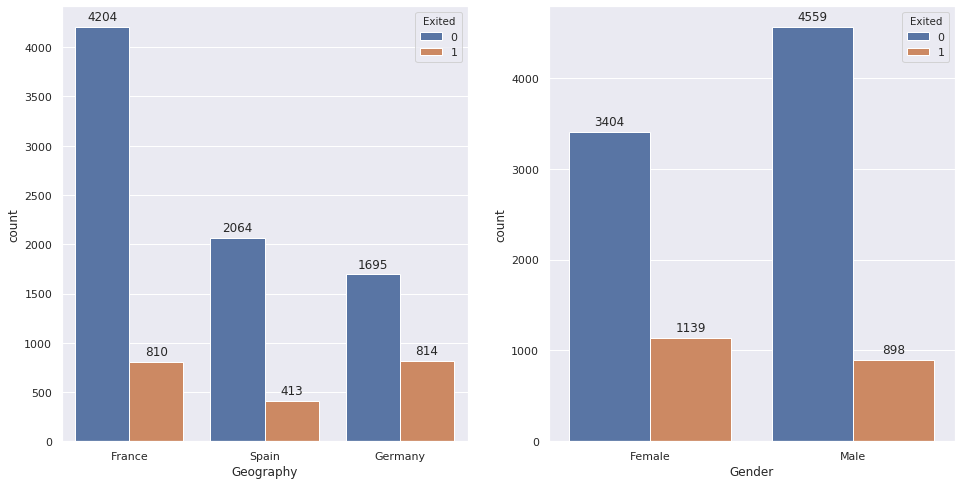

In [166]:
f, axes = plt.subplots(1, 2,figsize=(16,8))
splot=sns.countplot(df[catcol[0]],hue=df['Exited'],ax=axes[0])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

splot=sns.countplot(df[catcol[1]],hue=df['Exited'],ax=axes[1])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Observation :
* Accounts in Germany(50%) are more likely toto exited as compared to France and Spain (20%)
* ~ 33% of the female  are likely to exit as compared to male account(~20%)
* Non German account as a new feature can be formed

### Feature Engineering

In [167]:
# Feature dataframe
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [0]:
# Encoding categorical (string based) data. Country: there are 3 options: France, Spain and Germany
# This will convert those strings into scalar values for analysis
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


In [0]:
X=df.drop('Exited',axis=1)
y=df['Exited']

In [170]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [171]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [0]:
# we will encode the categorical variable [Geography ,Gender]

In [0]:
en_gender=LabelEncoder()
X['Gender']=en_gender.fit_transform(df['Gender'])

In [174]:
X.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71
6,822,France,1,50,7,0.00,2,1,1,10062.80
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88
8,501,France,1,44,4,142051.07,2,0,1,74940.50
9,684,France,1,27,2,134603.88,1,1,1,71725.73


In [175]:
en_gender.classes_

array(['Female', 'Male'], dtype=object)

In [176]:
en_gender.transform(['Female', 'Male'])

array([0, 1])

In [0]:
en_geo=LabelEncoder()
X['Geography']=en_geo.fit_transform(df['Geography'])

In [178]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [179]:
en_geo.classes_

array(['France', 'Germany', 'Spain'], dtype=object)

In [180]:
en_geo.transform(['France', 'Germany', 'Spain'])

array([0, 1, 2])

In [0]:
# we shall onehot encode Geography encoded variable

In [182]:
#One hot encoding. 

from keras.utils import to_categorical
encoded = pd.DataFrame(to_categorical(X['Geography']),columns=['France', 'Germany', 'Spain'])
#no need to encode Gender, as there are only two categories

X = pd.concat([encoded, X], axis = 1)
X.drop('Geography',axis=1,inplace=True)
X.head()


,France,Germany,Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,0.0,0.0,619,0,42,2,0.00,1,1,1,101348.88
1,0.0,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58
2,1.0,0.0,0.0,502,0,42,8,159660.80,3,1,0,113931.57
3,1.0,0.0,0.0,699,0,39,1,0.00,2,0,0,93826.63
4,0.0,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.10


### Dataframe of  new features
New binary categorical features are created based on EDA

In [0]:
Credit_score_less_than_400=X.apply(lambda x:1 if (x['CreditScore']<400) else 0, axis=1)
Number_of_product_greater_than_4=X.apply(lambda x:1 if (x['NumOfProducts']>4) else 0, axis=1)
Balance_greater_than_221533=X.apply(lambda x:1 if (x['Balance']>221533) else 0, axis=1)
Age_greater_than_42=X.apply(lambda x:1 if (x['Age']>42) else 0, axis=1)
newfeature=pd.concat([Credit_score_less_than_400,Number_of_product_greater_than_4,Balance_greater_than_221533,Age_greater_than_42],axis=1)
newfeature.rename(columns={0:'creditscore>400',1:'numberofproducts>4',2:'balance>221533',3:'age>42'},inplace=True)

In [185]:
# Concat new feature with Dataframe
X_mod=pd.concat([X,newfeature],axis=1)
X_mod.head()

,France,Germany,Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,creditscore>400,numberofproducts>4,balance>221533,age>42
0,1.0,0.0,0.0,619,0,42,2,0.00,1,1,1,101348.88,0,0,0,0
1,0.0,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,0
2,1.0,0.0,0.0,502,0,42,8,159660.80,3,1,0,113931.57,0,0,0,0
3,1.0,0.0,0.0,699,0,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,0.0,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [206]:
X_mod.shape # Chekc shape

(10000, 16)

In [187]:
X_mod.columns # check columns names

Index(['France', 'Germany', 'Spain', 'CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'creditscore>400', 'numberofproducts>4',
       'balance>221533', 'age>42'],
      dtype='object')

### Feature engineering completed
### Split in train and test set

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X_mod,y,train_size=.8,random_state=0)

In [0]:
sc=StandardScaler()

In [0]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [193]:
X_train[0:1]

array([[-1.01460667, -0.5698444 ,  1.74309049,  0.16958176, -1.09168714,
        -0.46460796,  0.00666099, -1.21571749,  0.8095029 ,  0.64259497,
        -1.03227043,  1.10643166, -0.04614678,  0.        , -0.01581337,
        -0.63386693]])

### Model building using keras

In [0]:
# Import `Sequential` from `keras.models`
from tensorflow.keras.models import Sequential

# Import `Dense` from `keras.layers`
from tensorflow.keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(16, activation='relu', input_shape=(16,)))

# Add one hidden layer 
model.add(Dense(16, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [0]:
#compile the model --> backpropagation -> gradient descent
model.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ['accuracy'])
#optimizer = algorithm to find the optimal set of weights in ANN
#loss = functions that should be optimized. if more than two categories, use "categorical_crossentropy"
#metrics = criterion used to calculate the performance of the model.

In [196]:
model.summary() # model summary

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [197]:
history = model.fit(X_train, y_train,epochs=100, batch_size=5, verbose=1) # fit model

Train on 8000 samples
Epoch 1/100
8000/8000 [==============================] - 3s 326us/sample - loss: 0.4454 - accuracy: 0.8016
Epoch 2/100
8000/8000 [==============================] - 2s 283us/sample - loss: 0.3713 - accuracy: 0.8450
Epoch 3/100
8000/8000 [==============================] - 2s 279us/sample - loss: 0.3496 - accuracy: 0.8514
Epoch 4/100
8000/8000 [==============================] - 2s 282us/sample - loss: 0.3436 - accuracy: 0.8543
Epoch 5/100
8000/8000 [==============================] - 2s 279us/sample - loss: 0.3407 - accuracy: 0.8560
Epoch 6/100
8000/8000 [==============================] - 2s 281us/sample - loss: 0.3391 - accuracy: 0.8572
Epoch 7/100
8000/8000 [==============================] - 2s 282us/sample - loss: 0.3367 - accuracy: 0.8576
Epoch 8/100
8000/8000 [==============================] - 2s 280us/sample - loss: 0.3355 - accuracy: 0.8611
Epoch 9/100
8000/8000 [==============================] - 2s 284us/sample - loss: 0.3329 - accuracy: 0.8629
Epoch 10/100
80

Text(0, 0.5, 'Error')

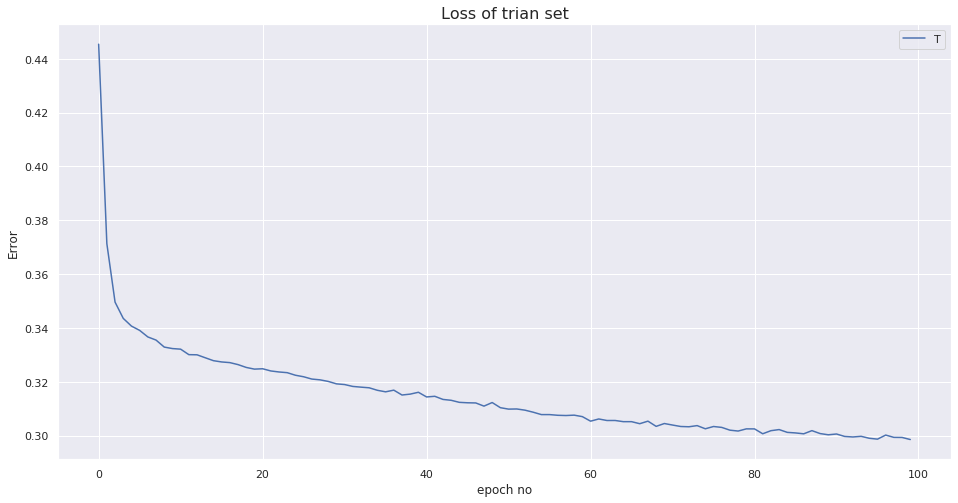

In [198]:
# plot erro vs epoch
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'],label='train')
plt.legend('Train')
plt.title('Loss of trian set',fontsize=16)
plt.xlabel('epoch no')
plt.ylabel('Error')

In [199]:
score = model.evaluate(X_test, y_test,verbose=0)
print('Test data ')
print('Loss: %0.2f\nAccuracy : %0.2f'%(score[0],score[1]))

Test data 
Loss: 0.36
Accuracy : 0.85


In [0]:
y_pred = np.round(model.predict(X_test)) # threshodl of 0.5

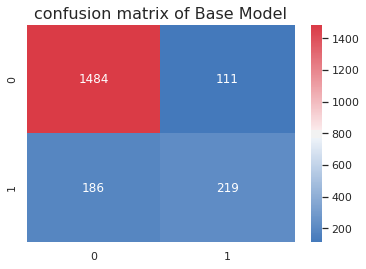

                 Classificaiton report of Base Model 

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1595
           1       0.66      0.54      0.60       405

    accuracy                           0.85      2000
   macro avg       0.78      0.74      0.75      2000
weighted avg       0.84      0.85      0.85      2000



In [202]:
from sklearn.metrics import classification_report,confusion_matrix,recall_score,classification_report
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,cmap = cmap,fmt='g')
plt.title('confusion matrix of Base Model',fontsize=16)
plt.show()
print('                 Classificaiton report of Base Model \n')
print(classification_report(y_test, y_pred))


* Overall accuracy of 85% is achieved,however recall rate of 60% is critical parameter for identification of customer who are likely to exit

### Model tuning

In [0]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [0]:
def create_model(neurons,epochs,batch_size):
  model = Sequential()
  model.add(Dense(neurons, activation='relu', input_shape=(16,)))
  model.add(Dense(neurons, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model


In [0]:
* hyper tuning is done for batchsize,number of neurons in each layer ,number of epochs

In [205]:
 from sklearn.model_selection import GridSearchCV
 #create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
batch_size = [5,10]
epochs = [50,100]
neurons = [8, 16]
param_grid = dict(neurons=neurons,batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.860500 using {'batch_size': 10, 'epochs': 50, 'neurons': 8}
0.859750 (0.001128) with: {'batch_size': 5, 'epochs': 50, 'neurons': 8}
0.855624 (0.003858) with: {'batch_size': 5, 'epochs': 50, 'neurons': 16}
0.856375 (0.001074) with: {'batch_size': 5, 'epochs': 100, 'neurons': 8}
0.851749 (0.005790) with: {'batch_size': 5, 'epochs': 100, 'neurons': 16}
0.860500 (0.003538) with: {'batch_size': 10, 'epochs': 50, 'neurons': 8}
0.859250 (0.002509) with: {'batch_size': 10, 'epochs': 50, 'neurons': 16}
0.858250 (0.003169) with: {'batch_size': 10, 'epochs': 100, 'neurons': 8}
0.854000 (0.002630) with: {'batch_size': 10, 'epochs': 100, 'neurons': 16}


### Final model with tunned parameter

In [0]:
model_tuned=create_model(8,50,10)

In [216]:
model_tuned.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_25 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 9         
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [217]:
history=model_tuned.fit(X_train,y_train,verbose=1,batch_size=10,epochs=50)

Train on 8000 samples
Epoch 1/50
8000/8000 [==============================] - 1s 185us/sample - loss: 0.5216 - accuracy: 0.7383
Epoch 2/50
8000/8000 [==============================] - 1s 150us/sample - loss: 0.4209 - accuracy: 0.8152
Epoch 3/50
8000/8000 [==============================] - 1s 150us/sample - loss: 0.4103 - accuracy: 0.8231
Epoch 4/50
8000/8000 [==============================] - 1s 148us/sample - loss: 0.4040 - accuracy: 0.8226
Epoch 5/50
8000/8000 [==============================] - 1s 154us/sample - loss: 0.3984 - accuracy: 0.8245
Epoch 6/50
8000/8000 [==============================] - 1s 154us/sample - loss: 0.3935 - accuracy: 0.8255
Epoch 7/50
8000/8000 [==============================] - 1s 153us/sample - loss: 0.3882 - accuracy: 0.8291
Epoch 8/50
8000/8000 [==============================] - 1s 140us/sample - loss: 0.3831 - accuracy: 0.8294
Epoch 9/50
8000/8000 [==============================] - 1s 138us/sample - loss: 0.3792 - accuracy: 0.8301
Epoch 10/50
8000/8000 [=

Text(0, 0.5, 'Error')

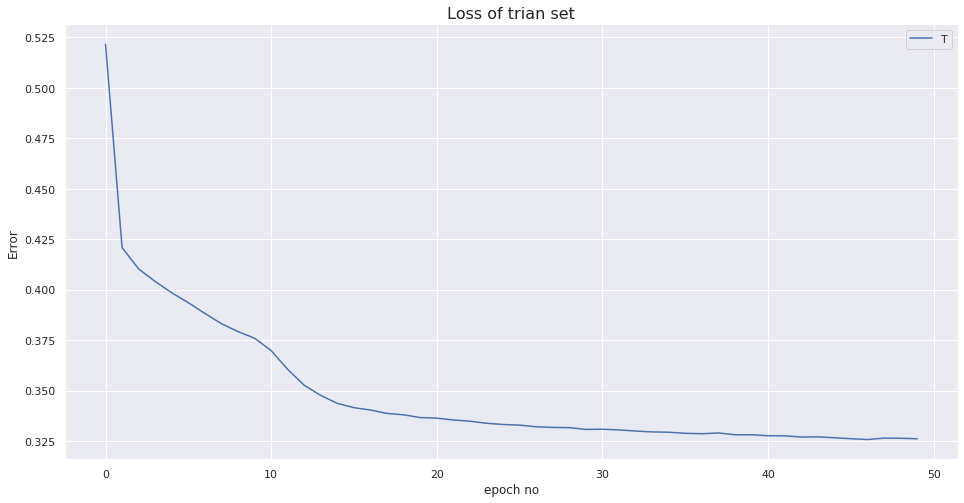

In [222]:
# plot erro vs epoch
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'],label='train')
plt.legend('Train')
plt.title('Loss of trian set with tunned parameter',fontsize=16)
plt.xlabel('epoch no')
plt.ylabel('Error')

In [219]:
score = model_tuned.evaluate(X_test, y_test,verbose=0)
print('Test data ')
print('Loss: %0.2f\nAccuracy : %0.2f'%(score[0],score[1]))

Test data 
Loss: 0.33
Accuracy : 0.87


In [0]:
y_tunned_pred = np.round(model_tuned.predict(X_test)) # threshodl of 0.5

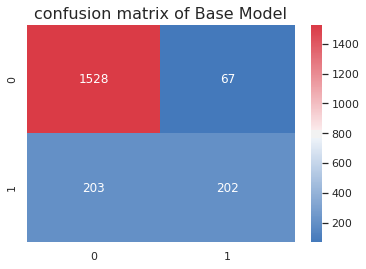

                 Classificaiton report of Base Model 

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.75      0.50      0.60       405

    accuracy                           0.86      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.86      0.85      2000



In [221]:

cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(confusion_matrix(y_test, y_tunned_pred),annot=True,cmap = cmap,fmt='g')
plt.title('confusion matrix of Base Model',fontsize=16)
plt.show()
print('                 Classificaiton report of Base Model \n')
print(classification_report(y_test, y_tunned_pred))

* Overall accuracy has improved to 86% from 85% , however the recall rate for customer likely to exit is only 50% which is lower than observed in base model 60%